# Plot Tangent line to curve using Derivative


Curve Functiuon: $f(x) = 3x^2-4x$

In [ ]:
%matplotlib inline

In [ ]:
# importing modules
import matplotlib.pyplot as plt
from scipy.misc import derivative
import numpy as np
  
# method to return function
def function(x):
    return 3 * x ** 2 - 4 * x
  
# method to return its derivative
# f'(x) = (f(x + h) - f(x)) / h
def deriv(x):
    return derivative(function, x)

def TangentLine(x, x1, y1, d1, t_b):
    # y = mx + b
    ret = (d1*x) + t_b
    print("ret: ", ret)
    return ret
  
#range in x-axis
x = np.arange(-3, 3, 0.1)
  
# plot the primary function
y = function(x)
plt.plot(x, y, color='brown', label='Function')

#Get the tangent line equasion parts y=mx+b
t_x = 3
t_y =function(t_x)
t_slope = deriv(t_x)
t_b = t_y - (t_slope * t_x)

# Define x data range for tangent line
xrange = np.linspace(t_x - 1, t_x + 1, 10)

# Print Debug
print("x: ", t_x, "\ny: ", t_slope, "\nslope: ", t_slope, "\ny intercept: ", t_b, "\nxrange: ", xrange)

# Plot Tangent Line
plt.scatter(t_x, t_y, color='blue', s=50)
plt.plot(xrange, TangentLine(xrange, t_x, t_y, t_slope, t_b), 'C1--', linewidth = 2)

# plotting Equasion text as legend
plt.text(-4.4, 25.0, r'$f(x)=3x^2-4x$', horizontalalignment='center', fontsize=18, color='brown')

plt.grid(True)

# Partial Derivative
$𝜕𝑦/(𝜕𝑥_𝑖 ) = lim_(ℎ→0)⁡〖(𝑓(𝑥_1…,〖 𝑥〗_𝑖+ℎ,〖…𝑥〗_𝑛 )−𝑓(𝑥_1…,〖 𝑥〗_𝑖,〖…𝑥〗_𝑛))/ℎ$


$f(x,y) = 3𝑥^2+4𝑦$


$f'(x,y) = lim_h->0$

In [ ]:
def f(x,y):
    return 3*x**2 + 4 * y


def derivative(f, x, y, x_h, y_h):
    return (f(x+x_h, y+y_h) - f(x,y)) / (x_h + y_h)
    
df_dx = derivative(f, 3, 4, 0.00001, 0)
df_dy = derivative(f, 3, 4, 0, 0.00001)

print("df_dx: ", df_dx)
print("df_dy: ", df_dy)

# Auto Grad on Multivariat Function

In [13]:
from mxnet import autograd, np, npx
import matplotlib.pyplot as plt

def func(x, y):
    return 3 * x ** 2 + 4 * y

npx.set_np()
#range in x-axis
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

# We allocate memory for a tensor's gradient by invoking `attach_grad`
x.attach_grad()
y.attach_grad()

# Place our code inside an `autograd.record` scope to build the computational
# graph
with autograd.record():
    z = func(x, y)
    
# After we calculate a gradient taken with respect to `x`, we will be able to
# access it via the `grad` attribute, whose values are initialized with 0s
print("x.grad: ", x.grad)
print("y.grad: ", y.grad)
print("z: ", z)

x.grad:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y.grad:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
z:  [15.         13.630003   12.319999   11.070001    9.879999    8.75
  7.6800003   6.67        5.7200003   4.829998    4.          3.23
  2.5199995   1.8700004   1.2800002   0.75        0.27999973 -0.13000011
 -0.48000002 -0.77       -1.         -1.1700001  -1.28       -1.3299999
 -1.3199999  -1.25       -1.1199998  -0.9299999  -0.6800001  -0.36999968
  0.          0.43000066  0.92000026  1.4699998   2.0800006   2.75
  3.480001    4.2700005   5.12        6.0300007   7.          8.029999
  9.120003   10.270002   11.480001   12.75       14.079999   15.470004
 16.920002   18.43       20.         21.629997   

In [14]:
z.backward()
print("x.grad: ", x.grad)
print("y.grad: ", y.grad)

x.grad:  [-18.         -17.400002   -16.8        -16.2        -15.599999
 -15.         -14.400001   -13.799999   -13.200001   -12.599999
 -12.         -11.4        -10.799999   -10.2         -9.6
  -9.          -8.4         -7.7999997   -7.2         -6.6000004
  -6.          -5.399999    -4.7999997   -4.2000003   -3.5999994
  -3.          -2.3999991   -1.7999997   -1.2000003   -0.5999994
   0.           0.60000086   1.2000003    1.7999997    2.4000006
   3.           3.6000009    4.2000003    4.7999997    5.4000006
   6.           6.5999994    7.2000017    7.800001     8.400001
   9.           9.599999    10.200002    10.800001    11.400001
  12.          12.599999    13.200002    13.800001    14.400001
  15.          15.599999    16.2         16.800001    17.400002  ]
y.grad:  [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


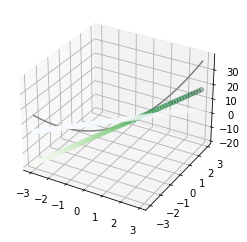

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')

zline = z.asnumpy()
xline = x.asnumpy()
yline = y.asnumpy()

ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xline, yline, x.grad.asnumpy(), c=x.grad.asnumpy(), cmap='Greens');
ax.scatter3D(xline, yline, y.grad.asnumpy(), c=y.grad.asnumpy(), cmap='Blues');